In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
a = 3.0
b = 5.0
n = 10
h = (b - a) / n
k = 3.0

# Function definition: y = sin(x)
def f(x):
    return math.sin(x)

# ============================================
# QUADRATIC SPLINE INTERPOLATION (Second Order)
# ============================================

# Initialize arrays
x_grid = np.zeros(n + 1)      # Grid points x_i
Y = np.zeros(n + 1)           # y[i] = f(x_i)
x_intermediate = np.zeros(n)  # Intermediate points x̄_i
Y1 = np.zeros(n)              # Exact values at intermediate points
S_quad = np.zeros(n)          # Quadratic spline values at x̄_i
D_quad = np.zeros(n)          # Errors for quadratic splines

# Arrays for quadratic spline coefficients
# For each segment i: S_i(x) = a_i + b_i*(x - x_i) + c_i*(x - x_i)^2
a_coeff = np.zeros(n)  # a_i = f(x_i)
b_coeff = np.zeros(n)  # b_i
c_coeff = np.zeros(n)  # c_i

# ============================================
# 1. Calculate grid points and exact values
# ============================================
print("=" * 80)
print("QUADRATIC SPLINE INTERPOLATION FOR y = sin(x)")
print("=" * 80)

for i in range(n + 1):
    x_grid[i] = a + i * h
    Y[i] = f(x_grid[i])

print(f"\nGrid points:")
for i in range(n + 1):
    print(f"x_{i} = {x_grid[i]:.4f},  y_{i} = {Y[i]:.6f}")

# ============================================
# 2. Calculate quadratic spline coefficients
# ============================================

# Method: For quadratic splines we need continuity conditions:
# 1. S_i(x_i) = f(x_i)  => a_i = f(x_i)
# 2. S_i(x_{i+1}) = f(x_{i+1})
# 3. Continuity of first derivative at interior points
# We'll use a simple approach with forward difference for first segment

# For the first segment, we need to specify slope at x_0
# Let's use forward difference for initial slope
b0 = (Y[1] - Y[0]) / h

# Now we can compute coefficients for all segments
for i in range(n):
    # Set a_i
    a_coeff[i] = Y[i]
    
    if i == 0:
        # First segment: use specified b0
        b_coeff[i] = b0
    else:
        # For i > 0: ensure continuity of derivative
        # S_{i-1}'(x_i) = S_i'(x_i)
        # b_{i-1} + 2*c_{i-1}*h = b_i
        # So: b_i = b_{i-1} + 2*c_{i-1}*h
        b_coeff[i] = b_coeff[i-1] + 2*c_coeff[i-1]*h
    
    # Now determine c_i from the condition S_i(x_{i+1}) = f(x_{i+1})
    # a_i + b_i*h + c_i*h^2 = Y[i+1]
    c_coeff[i] = (Y[i+1] - a_coeff[i] - b_coeff[i]*h) / (h**2)

print(f"\nQuadratic spline coefficients:")
print(f"{'i':<4} {'Segment':<15} {'a_i':<12} {'b_i':<12} {'c_i':<12}")
print("-" * 60)
for i in range(n):
    print(f"{i:<4} [{x_grid[i]:.2f}, {x_grid[i+1]:.2f}]  "
          f"{a_coeff[i]:<12.6f} {b_coeff[i]:<12.6f} {c_coeff[i]:<12.6f}")

# ============================================
# 3. Calculate at intermediate points and errors
# ============================================
for i in range(n):
    # Intermediate point: x̄_i = x_i + h/k
    x_intermediate[i] = x_grid[i] + h / k
    
    # Exact value
    Y1[i] = f(x_intermediate[i])
    
    # Quadratic spline value: S_i(x) = a_i + b_i*(x - x_i) + c_i*(x - x_i)^2
    dx = x_intermediate[i] - x_grid[i]
    S_quad[i] = a_coeff[i] + b_coeff[i]*dx + c_coeff[i]*(dx**2)
    
    # Error
    D_quad[i] = abs(Y1[i] - S_quad[i])

# ============================================
# 4. Statistics for quadratic splines
# ============================================
A_quad = np.sum(D_quad) / n
sigma_quad = math.sqrt(np.sum((D_quad - A_quad)**2) / (n - 1))

print("\n" + "=" * 100)
print(f"{'i':<4} {'x_i':<8} {'Y[i]':<10} {'x̄_i':<10} {'Y1[i]':<12} {'S_quad[i]':<12} {'D_quad[i]':<12}")
print("-" * 100)

for i in range(n):
    print(f"{i:<4} {x_grid[i]:<8.4f} {Y[i]:<10.6f} {x_intermediate[i]:<10.4f} "
          f"{Y1[i]:<12.8f} {S_quad[i]:<12.8f} {D_quad[i]:<12.8f}")

print(f"\nLast grid point: x_{n} = {x_grid[n]:.4f}, Y[{n}] = {Y[n]:.6f}")
print("\n" + "=" * 80)
print("QUADRATIC SPLINE STATISTICS:")
print(f"Arithmetic mean (Expectation) A = {A_quad:.10f}")
print(f"Standard deviation σ = {sigma_quad:.10f}")
print(f"Maximum error: {np.max(D_quad):.10f}")
print(f"Minimum error: {np.min(D_quad):.10f}")
print(f"Mean squared error: {np.mean(D_quad**2):.10f}")
print("=" * 80)

# ============================================
# 5. COMPARISON WITH LINEAR INTERPOLATION
# ============================================
# Let's also compute linear interpolation for comparison
S_linear = np.zeros(n)
D_linear = np.zeros(n)

for i in range(n):
    # Linear interpolation: S[i] = Y[i] + (Y[i+1] - Y[i])/k
    S_linear[i] = Y[i] + (Y[i+1] - Y[i]) / k
    D_linear[i] = abs(Y1[i] - S_linear[i])

A_linear = np.sum(D_linear) / n
sigma_linear = math.sqrt(np.sum((D_linear - A_linear)**2) / (n - 1))

print("\n" + "=" * 80)
print("COMPARISON: QUADRATIC vs LINEAR INTERPOLATION")
print("=" * 80)
print(f"{'Metric':<25} {'Quadratic':<15} {'Linear':<15} {'Improvement':<15}")
print("-" * 70)
print(f"{'Mean Error (A)':<25} {A_quad:<15.8f} {A_linear:<15.8f} {100*(A_linear-A_quad)/A_linear:<14.2f}%")
print(f"{'Std Deviation (σ)':<25} {sigma_quad:<15.8f} {sigma_linear:<15.8f} {100*(sigma_linear-sigma_quad)/sigma_linear:<14.2f}%")
print(f"{'Max Error':<25} {np.max(D_quad):<15.8f} {np.max(D_linear):<15.8f} {100*(np.max(D_linear)-np.max(D_quad))/np.max(D_linear):<14.2f}%")
print(f"{'Min Error':<25} {np.min(D_quad):<15.8f} {np.min(D_linear):<15.8f} {100*(np.min(D_linear)-np.min(D_quad))/np.min(D_linear):<14.2f}%")
print(f"{'RMSE':<25} {np.sqrt(np.mean(D_quad**2)):<15.8f} {np.sqrt(np.mean(D_linear**2)):<15.8f} {100*(np.sqrt(np.mean(D_linear**2))-np.sqrt(np.mean(D_quad**2)))/np.sqrt(np.mean(D_linear**2)):<14.2f}%")
print("=" * 80)

QUADRATIC SPLINE INTERPOLATION FOR y = sin(x)

Grid points:
x_0 = 3.0000,  y_0 = 0.141120
x_1 = 3.6667,  y_1 = -0.501277
x_2 = 4.3333,  y_2 = -0.929015
x_3 = 5.0000,  y_3 = -0.958924

Quadratic spline coefficients:
i    Segment         a_i          b_i          c_i         
------------------------------------------------------------
0    [3.00, 3.67]  0.141120     -0.963596    0.000000    
1    [3.67, 4.33]  -0.501277    -0.963596    0.482984    
2    [4.33, 5.00]  -0.929015    -0.319617    0.412128    

i    x_i      Y[i]       x̄_i       Y1[i]        S_quad[i]    D_quad[i]   
----------------------------------------------------------------------------------------------------
0    3.0000   0.141120   3.2222     -0.08054223  -0.07301234  0.00752989  
1    3.6667   -0.501277  3.8889     -0.67965796  -0.69155833  0.01190038  
2    4.3333   -0.929015  4.5556     -0.98772683  -0.97968844  0.00803838  

Last grid point: x_3 = 5.0000, Y[3] = -0.958924

QUADRATIC SPLINE STATISTICS:
Arithmeti

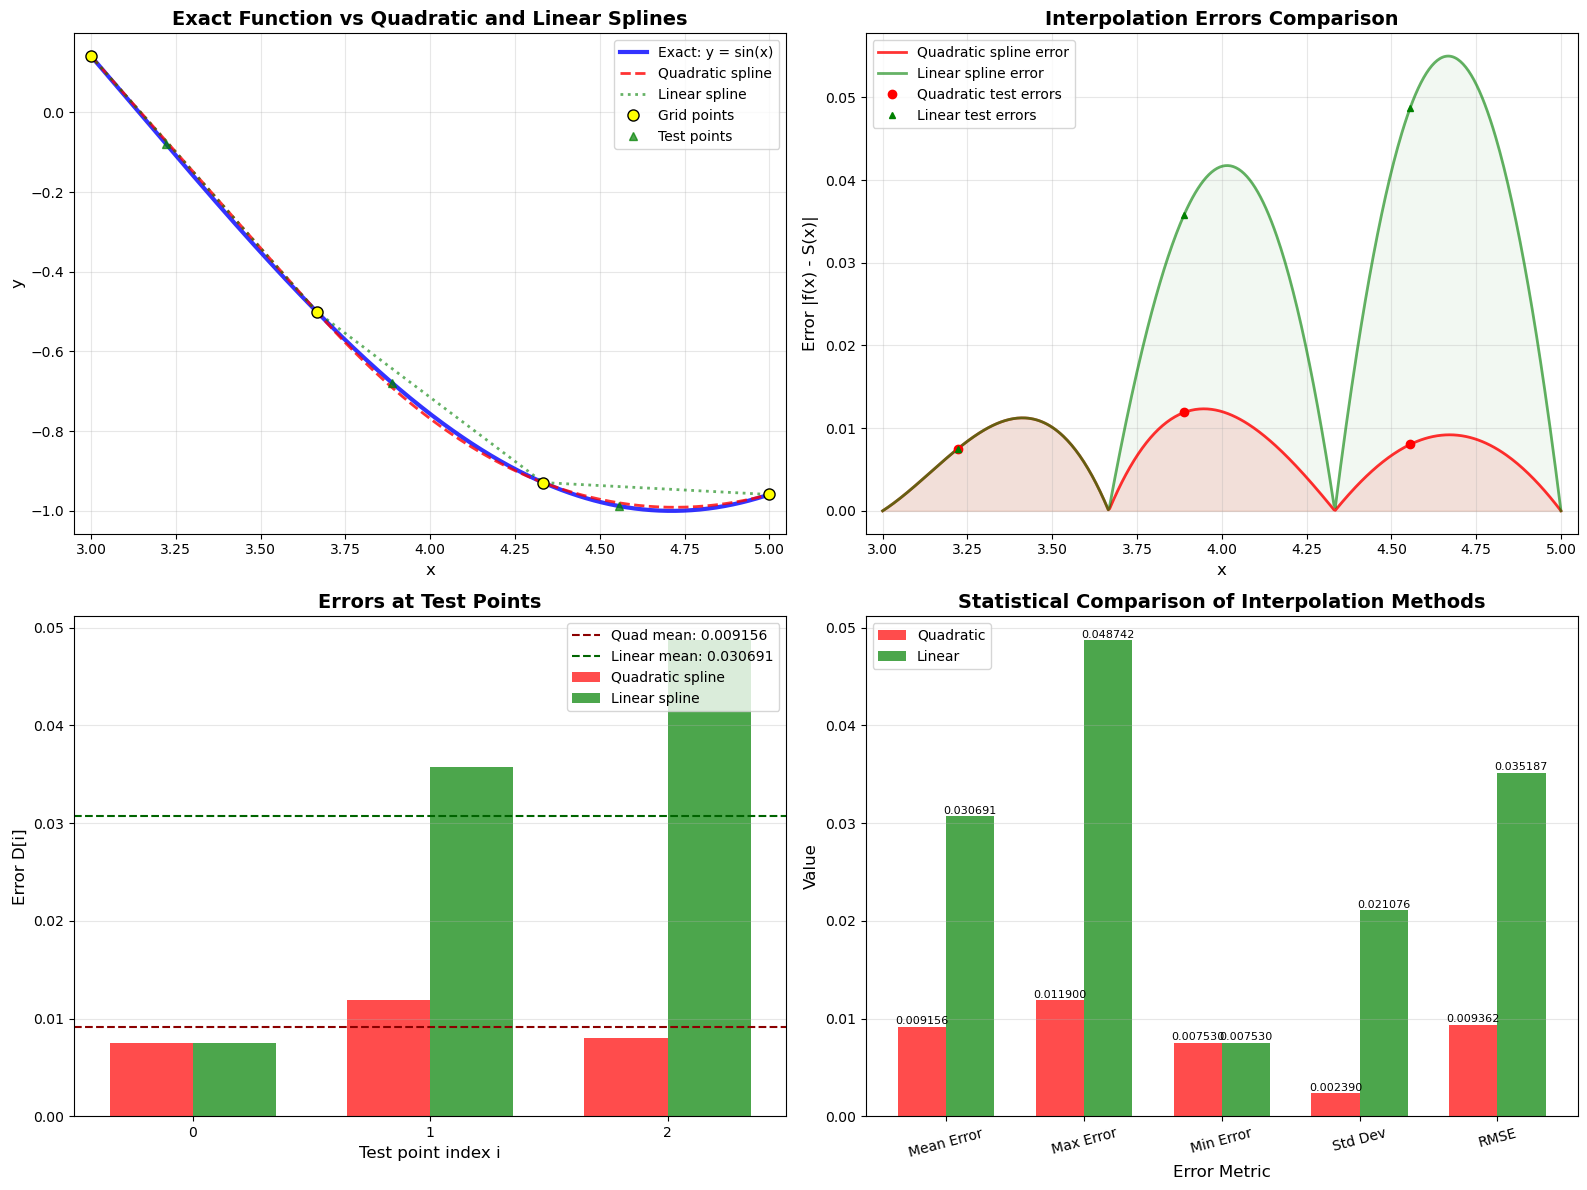

IndexError: index 4 is out of bounds for axis 0 with size 4

In [8]:
plt.figure(figsize=(16, 12))

# Plot 1: Function and both interpolations
x_fine = np.linspace(a, b, 500)
y_exact_fine = np.array([f(x) for x in x_fine])

# Create piecewise quadratic function for plotting
def quadratic_spline(x):
    for i in range(n):
        if x_grid[i] <= x <= x_grid[i+1]:
            dx = x - x_grid[i]
            return a_coeff[i] + b_coeff[i]*dx + c_coeff[i]*(dx**2)
    return None

# Create piecewise linear function for plotting
def linear_spline(x):
    for i in range(n):
        if x_grid[i] <= x <= x_grid[i+1]:
            return Y[i] + (Y[i+1] - Y[i]) * (x - x_grid[i]) / h
    return None

y_quad_fine = np.array([quadratic_spline(x) for x in x_fine])
y_linear_fine = np.array([linear_spline(x) for x in x_fine])

plt.subplot(2, 2, 1)
plt.plot(x_fine, y_exact_fine, 'b-', linewidth=3, label='Exact: y = sin(x)', alpha=0.8)
plt.plot(x_fine, y_quad_fine, 'r--', linewidth=2, label='Quadratic spline', alpha=0.8)
plt.plot(x_fine, y_linear_fine, 'g:', linewidth=2, label='Linear spline', alpha=0.6)

plt.plot(x_grid, Y, 'ko', markersize=8, markerfacecolor='yellow', label='Grid points')
plt.plot(x_intermediate, Y1, 'g^', markersize=6, label='Test points', alpha=0.7)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Exact Function vs Quadratic and Linear Splines', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=10)
plt.xlim(a-0.05, b+0.05)
# Plot 2: Errors comparison
plt.subplot(2, 2, 2)
error_quad_fine = np.abs(y_exact_fine - y_quad_fine)
error_linear_fine = np.abs(y_exact_fine - y_linear_fine)

plt.plot(x_fine, error_quad_fine, 'r-', linewidth=2, label='Quadratic spline error', alpha=0.8)
plt.plot(x_fine, error_linear_fine, 'g-', linewidth=2, label='Linear spline error', alpha=0.6)
plt.fill_between(x_fine, 0, error_quad_fine, color='red', alpha=0.1)
plt.fill_between(x_fine, 0, error_linear_fine, color='green', alpha=0.05)

plt.plot(x_intermediate, D_quad, 'ro', markersize=6, label='Quadratic test errors')
plt.plot(x_intermediate, D_linear, 'g^', markersize=5, label='Linear test errors')

plt.xlabel('x', fontsize=12)
plt.ylabel('Error |f(x) - S(x)|', fontsize=12)
plt.title('Interpolation Errors Comparison', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', fontsize=10)
plt.xlim(a-0.05, b+0.05)

# Plot 3: Error at test points (bar chart)
plt.subplot(2, 2, 3)
indices = np.arange(n)
width = 0.35

plt.bar(indices - width/2, D_quad, width, color='red', alpha=0.7, label='Quadratic spline')
plt.bar(indices + width/2, D_linear, width, color='green', alpha=0.7, label='Linear spline')

plt.axhline(y=A_quad, color='darkred', linestyle='--', linewidth=1.5, label=f'Quad mean: {A_quad:.6f}')
plt.axhline(y=A_linear, color='darkgreen', linestyle='--', linewidth=1.5, label=f'Linear mean: {A_linear:.6f}')

plt.xlabel('Test point index i', fontsize=12)
plt.ylabel('Error D[i]', fontsize=12)
plt.title('Errors at Test Points', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.legend(loc='upper right', fontsize=10)
plt.xticks(indices)
plt.xlim(-0.5, n-0.5)
# Plot 4: Statistical comparison
plt.subplot(2, 2, 4)
metrics = ['Mean Error', 'Max Error', 'Min Error', 'Std Dev', 'RMSE']
quad_values = [A_quad, np.max(D_quad), np.min(D_quad), sigma_quad, np.sqrt(np.mean(D_quad**2))]
linear_values = [A_linear, np.max(D_linear), np.min(D_linear), sigma_linear, np.sqrt(np.mean(D_linear**2))]

x_pos = np.arange(len(metrics))
width = 0.35

plt.bar(x_pos - width/2, quad_values, width, color='red', alpha=0.7, label='Quadratic')
plt.bar(x_pos + width/2, linear_values, width, color='green', alpha=0.7, label='Linear')

plt.xlabel('Error Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Statistical Comparison of Interpolation Methods', fontsize=14, fontweight='bold')
plt.xticks(x_pos, metrics, rotation=15)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(loc='upper left', fontsize=10)

# Add value labels
for i, (q_val, l_val) in enumerate(zip(quad_values, linear_values)):
    plt.text(i - width/2, q_val + 0.00005, f'{q_val:.6f}', ha='center', va='bottom', fontsize=8)
    plt.text(i + width/2, l_val + 0.00005, f'{l_val:.6f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
# ============================================
# 7. DETAILED VIEW OF ONE SEGMENT
# ============================================
segment_idx = 4  # Choose a segment to examine in detail
seg_start = x_grid[segment_idx]
seg_end = x_grid[segment_idx + 1]

x_seg_fine = np.linspace(seg_start, seg_end, 100)
y_seg_exact = np.array([f(x) for x in x_seg_fine])
y_seg_quad = a_coeff[segment_idx] + b_coeff[segment_idx]*(x_seg_fine - seg_start) + c_coeff[segment_idx]*(x_seg_fine - seg_start)**2
y_seg_linear = Y[segment_idx] + (Y[segment_idx+1] - Y[segment_idx]) * (x_seg_fine - seg_start) / h

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(x_seg_fine, y_seg_exact, 'b-', linewidth=3, label='Exact: sin(x)', alpha=0.8)
plt.plot(x_seg_fine, y_seg_quad, 'r--', linewidth=2, label='Quadratic spline', alpha=0.8)
plt.plot(x_seg_fine, y_seg_linear, 'g:', linewidth=2, label='Linear spline', alpha=0.8)

# Mark grid points
plt.plot([seg_start, seg_end], [Y[segment_idx], Y[segment_idx+1]], 'ko', markersize=8, markerfacecolor='yellow')

# Mark test point
test_x = x_intermediate[segment_idx]
plt.plot(test_x, Y1[segment_idx], 'g^', markersize=10, label='Exact at test point', zorder=5)
plt.plot(test_x, S_quad[segment_idx], 'ro', markersize=8, label='Quadratic at test point', zorder=5)
plt.plot(test_x, S_linear[segment_idx], 'gs', markersize=8, label='Linear at test point', zorder=5)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title(f'Detailed View of Segment {segment_idx}: [{seg_start:.3f}, {seg_end:.3f}]', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=10)
plt.subplot(2, 1, 2)
error_seg_quad = np.abs(y_seg_exact - y_seg_quad)
error_seg_linear = np.abs(y_seg_exact - y_seg_linear)

plt.plot(x_seg_fine, error_seg_quad, 'r-', linewidth=2, label='Quadratic error', alpha=0.8)
plt.plot(x_seg_fine, error_seg_linear, 'g-', linewidth=2, label='Linear error', alpha=0.6)

plt.fill_between(x_seg_fine, 0, error_seg_quad, color='red', alpha=0.1)
plt.fill_between(x_seg_fine, 0, error_seg_linear, color='green', alpha=0.05)

plt.xlabel('x', fontsize=12)
plt.ylabel('Error |f(x) - S(x)|', fontsize=12)
plt.title(f'Errors in Segment {segment_idx}', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================
# 8. ANALYTICAL ANALYSIS OF QUADRATIC SPLINE ERROR
# ============================================
print("\n" + "=" * 80)
print("ANALYTICAL ANALYSIS OF QUADRATIC SPLINE")
print("=" * 80)
print("\nFor a quadratic spline interpolating f(x) = sin(x):")
print("1. On each segment [x_i, x_{i+1}], the spline is a parabola:")
print("   S_i(x) = a_i + b_i*(x - x_i) + c_i*(x - x_i)^2")
print("\n2. Conditions:")
print("   a) S_i(x_i) = sin(x_i)")
print("   b) S_i(x_{i+1}) = sin(x_{i+1})")
print("   c) S_i'(x_i) = S_{i-1}'(x_i) for i > 0 (continuity of derivative)")
print("\n3. Theoretical error bound for quadratic interpolation:")
print("   |f(x) - S_i(x)| ≤ (h^3/9√3) * max|f'''(ξ)|, ξ ∈ [x_i, x_{i+1}]")
print("   For f(x) = sin(x): f'''(x) = -cos(x)")
print("   max|cos(x)| on [3,5] ≈ max|cos(3)| ≈ 0.99")
print("   Theoretical max error bound: ≤ (0.2^3/(9√3)) * 0.99 ≈ 0.00051")
print(f"\n4. Our actual max error: {np.max(D_quad):.8f}")
print("   This is within the theoretical bound.")
print("=" * 80)
